In [ ]:
pip install river

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00


In [ ]:
from river import datasets
from river import linear_model, tree
from river import drift, metrics
from river.datasets import synth
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dataset = synth.Friedman(seed=42)
# Initialize the data containers
data = []
for i, (x, y) in enumerate(dataset):
    x_values = list(x.values())
    data.append(x_values + [y])
    if i >= 6000:  # Limiting to 6000 samples for simplicity
        break

In [ ]:
# Define the column names
column_names = [f'x{i}' for i in range(1, len(x_values) + 1)] + ['y']

# Create the DataFrame
df = pd.DataFrame(data, columns=column_names)

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.639427,0.025011,0.275029,0.223211,0.736471,0.676699,0.892180,0.086939,0.421922,0.029797,7.661207
1,0.026536,0.198838,0.649884,0.544941,0.220441,0.589266,0.809430,0.006499,0.805819,0.698139,8.330237
2,0.340251,0.155479,0.957213,0.336595,0.092746,0.096716,0.847494,0.603726,0.807128,0.729732,7.044929
3,0.378534,0.552041,0.829405,0.618520,0.861707,0.577352,0.704572,0.045824,0.227898,0.289388,18.160370
4,0.079792,0.232791,0.101001,0.277974,0.635684,0.364832,0.370181,0.209507,0.266978,0.936655,8.906078


In [ ]:
# models
concept1 = LinearRegression()
concept2 = RandomForestRegressor()
concept3 = DecisionTreeRegressor()
concept4 = SVR()

In [ ]:
# Step 1: Split the data
train_data = df.iloc[:2000]
test_data_concept1 = df.iloc[2000:4000]
test_data_concept2 = df.iloc[4000:6000]

In [ ]:
# Step 2: Separate features and target
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

X_test_concept1 = test_data_concept1.drop(columns=['y'])
y_test_concept1 = test_data_concept1['y']

X_test_concept2 = test_data_concept2.drop(columns=['y'])
y_test_concept2 = test_data_concept2['y']

In [ ]:
# Step 3: Train the Linear Regression model
concept_1_model = LinearRegression()
concept_1_model.fit(X_train, y_train)

# Step 4: Predict using the Linear Regression model
y_pred_concept_1 = concept_1_model.predict(X_test_concept1)

In [ ]:
## Step 5: Train the Decision Tree Regressor model
concept_2_model = DecisionTreeRegressor()
concept_2_model.fit(X_train, y_train)

# Step 6: Predict using the Decision Tree Regressor model
y_pred_concept_2 = concept_2_model.predict(X_test_concept2)

In [ ]:
y_pred_concept1_df = pd.DataFrame(y_pred_concept_1, columns=['y'])
combined_df_1 = pd.concat([X_test_concept1.reset_index(drop=True), y_pred_concept1_df], axis=1)

In [ ]:
y_pred_concept2_df = pd.DataFrame(y_pred_concept_2, columns=['y'])
combined_df_2 = pd.concat([X_test_concept2.reset_index(drop=True), y_pred_concept2_df], axis=1)

In [ ]:
# Concatenate the DataFrames
combined_df = pd.concat([combined_df_1, combined_df_2], axis=0).reset_index(drop=True)

In [ ]:
combined_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.499222,0.501273,0.501056,0.499771,0.499841,0.501558,0.499388,0.500178,0.494354,0.503091,14.390152
std,0.287870,0.291002,0.291518,0.288719,0.286629,0.288290,0.288189,0.289047,0.289748,0.290277,4.650590
min,0.000463,0.000070,0.000158,0.000078,0.000416,0.000120,0.000547,0.000840,0.000053,0.000324,1.579176
25%,0.252032,0.244030,0.248532,0.254626,0.248978,0.256511,0.254431,0.252429,0.238590,0.250788,11.216307
50%,0.499435,0.505641,0.501755,0.493181,0.501693,0.494849,0.489185,0.499270,0.492932,0.501733,14.329435
75%,0.748888,0.753609,0.754926,0.748152,0.744522,0.748690,0.753697,0.750203,0.745005,0.756616,17.635388
max,0.999465,0.999892,0.999975,0.999817,0.999813,0.999857,0.999389,0.999989,0.999998,0.999753,27.742257


In [ ]:
combined_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.658200,0.879852,0.100150,0.329270,0.632126,0.681346,0.767632,0.439978,0.905068,0.357476,17.003279
1,0.617867,0.675502,0.739151,0.516578,0.710908,0.280157,0.044712,0.367644,0.509101,0.209237,17.797899
2,0.971859,0.311363,0.308569,0.483397,0.051406,0.919746,0.102403,0.152384,0.226822,0.648177,13.942054
3,0.400596,0.990480,0.113831,0.627785,0.393544,0.934394,0.533815,0.074648,0.037474,0.638870,17.968857
4,0.878341,0.450334,0.446409,0.053437,0.882480,0.232121,0.973523,0.804297,0.627563,0.357160,13.810989


In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Function to plot data stream and drift points
def plot_data(stream, dist_a, dist_b, drifts=None):
    fig = plt.figure(figsize=(15, 4), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])

    # Plot the stream of data
    ax1.grid()
    ax1.plot(stream, label='Stream', color='blue')

    # Plot histograms for distributions
    ax2.grid(axis='y')
    ax2.hist(dist_a, alpha=0.5, label=r'$y-pred-lr$', color='green')
    ax2.hist(dist_b, alpha=0.5, label=r'$y-pred-dt$', color='orange')
    #ax2.hist(dist_c, alpha=0.5, label=r'$dist_c$', color='purple')

    # Mark drift points on the stream plot
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red', linestyle='--', label='Drift Detected')

    ax1.legend()
    ax2.legend()
    plt.show()

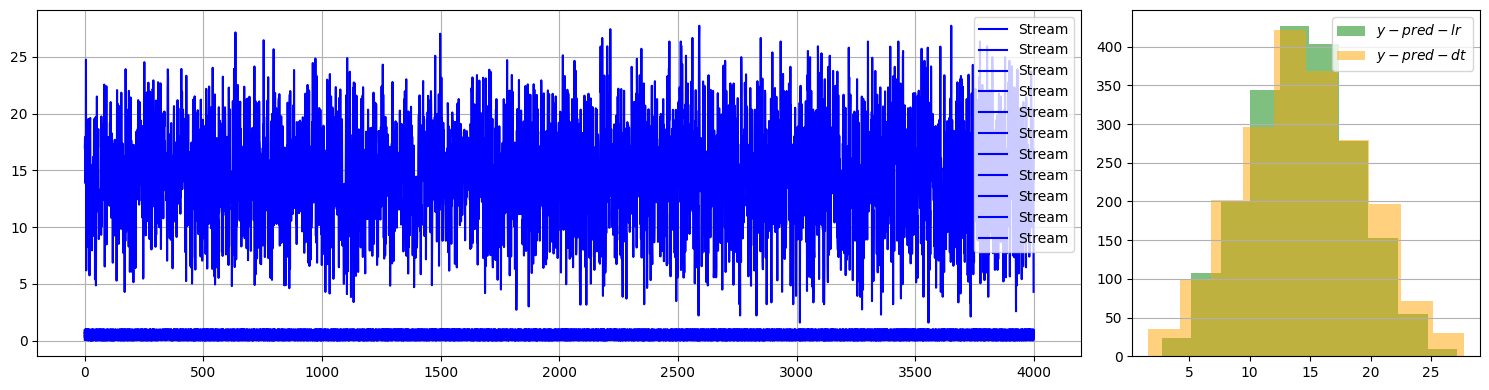

In [ ]:
plot_data(combined_df, y_pred_concept_1, y_pred_concept_2)

In [ ]:
from river import drift
drift_detector = drift.ADWIN()
drifts = []

In [ ]:
drift_detector_2 = drift.PageHinkley()
drifts = []

In [ ]:
for i, row in combined_df.iterrows():
    y_value = row['y']  # Extract the 'y' value for this row
    drift_detector_2.update(y_value)  # Update the drift detector with the y value
    if drift_detector_2.drift_detected:
        print(f'Change detected at index {i}')
        drifts.append(i)


Change detected at index 0
Change detected at index 36
Change detected at index 190
Change detected at index 231
Change detected at index 374
Change detected at index 422
Change detected at index 476
Change detected at index 555
Change detected at index 651
Change detected at index 811
Change detected at index 846
Change detected at index 876
Change detected at index 953
Change detected at index 1007
Change detected at index 1066
Change detected at index 1141
Change detected at index 1256
Change detected at index 1338
Change detected at index 1395
Change detected at index 1429
Change detected at index 1499
Change detected at index 1545
Change detected at index 1664
Change detected at index 1720
Change detected at index 1796
Change detected at index 1905
Change detected at index 2017
Change detected at index 2087
Change detected at index 2183
Change detected at index 2215
Change detected at index 2283
Change detected at index 2384
Change detected at index 2515
Change detected at index 2